##### Model without CNNs ..... using only Dense layers
// Code by Om

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalization
training_images = training_images/255.0
test_images = test_images/255.0

In [5]:
# Create model

model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

print(model.summary())

2025-06-14 15:45:58.567669: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-14 15:45:58.567849: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-14 15:45:58.567857: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1749896158.568363 10936210 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1749896158.568440 10936210 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
# Compile and train model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5


2025-06-14 15:45:59.281967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7722 - loss: 0.6541
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8363 - loss: 0.4727
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8402 - loss: 0.4617
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8430 - loss: 0.4592
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8416 - loss: 0.4648
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8364 - loss: 0.4980


[0.5161888003349304, 0.8294000029563904]

##### Model with CNNs

In [7]:
cnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,'relu'),
    tf.keras.layers.Dense(10, 'softmax')
])

print(cnn_model.summary(show_trainable=True))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ conv2d (Conv2D)             │ (None, 26, 26, 64)    │        640 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d               │ (None, 13, 13, 64)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_1 (Conv2D)           │ (None, 11, 11, 64)    │     36,928 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_1             │ (None, 5, 5, 64)      │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_1 (Flatten)         │ (None, 1600)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_2 (Dense)             │ (None, 128)           │    204,928 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_3 (Dense)             │ (None, 10)            │      1,290 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
# Compile and train the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(training_images, training_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.7711 - loss: 0.6291 - val_accuracy: 0.8765 - val_loss: 0.3525
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8805 - loss: 0.3287 - val_accuracy: 0.8862 - val_loss: 0.3033
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8930 - loss: 0.3009 - val_accuracy: 0.8932 - val_loss: 0.3075
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8954 - loss: 0.3114 - val_accuracy: 0.8950 - val_loss: 0.3770
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8937 - loss: 0.3688 - val_accuracy: 0.8735 - val_loss: 0.5979


In [9]:
# Evaluate
cnn_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8627 - loss: 0.6761


[0.6693527102470398, 0.864300012588501]

##### Visualize the Convolutions and Pooling

In [28]:
print(test_labels[:20])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


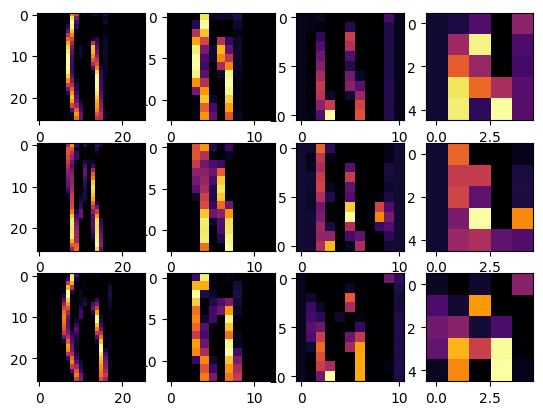

In [26]:
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 1
layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

layer_outputs = [layer.output for layer in cnn_model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs = cnn_model.inputs, outputs=layer_outputs)

f, axarr = plt.subplots(3,len(layer_outputs))

for x in range(len(layer_outputs)):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
  
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
  
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)